![SG_Banner](SG_Banner.png)

<center>Copyright by Super Genii, Inc.</center>
<center><em>For more information, visit us at <a href='https://supergenii.com'>supergenii.com</a></em></center>

# Project: Russian state-controlled TV coverage of 2014 Ukranian elections
  

## Overview
The project examines the coverage of the 2014 Ukrainian parliamentary elections by Russian state-controlled television, against the backdrop of significant political and military turmoil. Leading up to the elections, Ukraine was embroiled in a crisis following the annexation of Crimea by Russia and the ensuing conflict in Eastern Ukraine. The areas near the Russian border, particularly the Donetsk and Luhansk regions, were hotbeds of separatist activity, heavily influenced by Russian support for the rebels. The project's focus is to analyze the effect of Russian media portrayals of these elections, considering the broader context of escalating tensions between Ukraine and Russia, the presence of Russian military forces, and the intense propaganda war aimed at shaping public opinion both domestically and internationally.


## Goal
The goal is to assess the impact of Russian TV reception on the 2014 Ukrainian parliamentary elections. This assessment is conducted on two levels. First, we examine individual-level survey data to determine its influence on a person's likelihood of voting for a pro-Russian party. Second, we evaluate aggregate-level data to gauge its effect on the vote share of pro-Russian parties at the precinct level. In both analyses, the focus is on regions near the Russian border.


## The Data
The dataset 'UA_survey' contains information from 358 respondents to a survey conducted a few months after the 2014 parliamentary election. The survey was conducted on a random sample of Ukrainians living in precincts within 50 km of the Russian border.

The dataset 'UA_precincts.csv' comprises aggregate-level data from 3,589 precincts in three northeastern Ukrainian provinces: Chernihiv, Sumy, and Kharkiv. These provinces are unique among Ukrainian regions bordering Russia, as they did not close their polling stations due to the ongoing conflict. These are also the provinces where the survey respondents resided.


Acknowledgements  
Based on Leonid Peisakhlin and Arturas Rozenas, "Electoral Effects of Biased Media: Russian Television in Ukraine," _American Journal of Political Science_ 62, no. 3 (2018): 535-50.

(Datasets downloaded from http://press.princeton.edu/)

## <div style="text-align: center">Data Column Reference</div>

UA_survey.csv:

| **Variable** | **Description** |
|:---------|:---------|
| russian_tv | Identifies whether the respondent's precinct receives Russian TV: 1=reception, 0=no reception |
| pro_russian_vote | Respondents' vote for a pro-Russian party in the 2014 parliamentary election: 1=voted for pro_russian party, 0=did not  |
| within_25km | Identifies whether the respondent's precinct is located within 25 km of the Ukraine_Russia border: 1=it is within 25 km of the border, 0=it is not| 


UA_precincts.csv:

| **Variable** | **Description** |
|:---------|:---------|
| russian_tv | Identifies precincts that receive Russian TV: 1=reception, 0=no reception |
| pro_russian | Vote share received in the precinct by pro-Russian parties in the 2014 Ukrainian parliamentary election (in percentage)  |
| prior_pro_russian | Vote share received in the precinct by pro-Russian parties in the 2012 Ukrainian parliamentary election (in percentage)  |
| within_25km | Identifies precincts that are within 25 km of the Ukraine_Russia border: 1=it is within 25 km of the border, 0=it is not| 

-----

## Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
import statsmodels.formula.api as smf

## Get the data and display it

In [5]:
survey = pd.read_csv('Data/UA_survey.csv')

In [6]:
survey.head()

,russian_tv,pro_russian_vote,within_25km
0,1,0,1
1,1,1,1
2,0,0,0
3,0,0,1
4,0,0,1


In [7]:
uap = pd.read_csv('Data/UA_precincts.csv')

In [8]:
uap.head()

,russian_tv,pro_russian,prior_pro_russian,within_25km
0,0,2.721088,25.142857,1
1,0,0.892857,35.344828,0
2,1,1.694915,20.532319,1
3,0,72.268908,84.477612,1
4,0,1.282051,28.994083,0


## Clean the data

Both datasets have already been cleaned and prepared for estimating causal effects with observational data.

### Examine the data

In [9]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   russian_tv        358 non-null    int64
 1   pro_russian_vote  358 non-null    int64
 2   within_25km       358 non-null    int64
dtypes: int64(3)
memory usage: 8.5 KB


In [10]:
uap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589 entries, 0 to 3588
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   russian_tv         3589 non-null   int64  
 1   pro_russian        3589 non-null   float64
 2   prior_pro_russian  3589 non-null   float64
 3   within_25km        3589 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 112.3 KB


<u>Potential problems:</u>
- no null/missing values

-----

## Individual-level analysis

## Use the simple linear model to compute the difference-in-means estimator

In [11]:
# calculate the difference-in-means estimator
survey[survey['russian_tv'] == 1]['pro_russian_vote'].mean() - survey[survey['russian_tv'] == 0]['pro_russian_vote'].mean()

0.1191139240506329

In [12]:
smf.ols('pro_russian_vote ~ russian_tv', data=survey).fit().summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       pro_russian_vote   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
No. Observations:                 358   F-statistic:                     7.014
Covariance Type:            nonrobust   Prob (F-statistic):            0.00845
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1709      0.034      5.083      0.000       0.105       0.237
russian_tv     0.1191      0.045      2.648      0.008       0.031       0.208
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Fitted linear model            
$\widehat{pro-russian-vote}$ = 0.1709 + 0.1191 _russian_tv_

The value 0.1191 $\approx$ 0.12 (equivalent to the difference-in-means estimator) estimates that receiving Russian TV (as compared to not receiving it) increased a respondent's probability of voting for a pro_Russian party by 12 percentage points, on average.

The validity of the above conclusion depends on the absence of confounding variables.

-----

## Control for confounders using a multiple linear regression model

### Identify confounder

In [13]:
survey[['within_25km','russian_tv']].corr()

,within_25km,russian_tv
within_25km,1.000000,0.812775
russian_tv,0.812775,1.000000


The correlation coefficient between the two variables is 0.81. 'within_25km' and 'russian_tv' are highly correlated.

In [14]:
# create two-way table of frequencies
pd.crosstab(survey['within_25km'], survey['russian_tv'], margins=True, margins_name='All respondents')

russian_tv,0,1,All respondents
within_25km,,,
0,139,14,153
1,19,186,205
All respondents,158,200,358


In [15]:
round(pd.crosstab(survey['within_25km'], survey['russian_tv'], margins=True, 
                  margins_name='All respondents', normalize='index') * 100, 1)

russian_tv,0,1
within_25km,,
0,90.8,9.2
1,9.3,90.7
All respondents,44.1,55.9


Among respondents living within 25 km of the border, about 91% are in a precinct that receives Russian TV. In contrast, among respondents living more than 25 km away from the border, about 9% are in a precinct that receives Russian TV. We can conclude that compared to Ukrainians living further away from the border, those living very close to it are more likely to receive Russian TV. 

Living within 25 km from the border affects the treatment variable 'russian_tv.'

In [16]:
survey[['within_25km','pro_russian_vote']].corr()

,within_25km,pro_russian_vote
within_25km,1.000000,0.030877
pro_russian_vote,0.030877,1.000000


The correlation coefficient indicates a very weak positive linear relationship, which is likely not significant in practical terms.

In [17]:
round(pd.crosstab(survey['pro_russian_vote'], survey['within_25km'], normalize='columns') * 100, 1)

within_25km,0,1
pro_russian_vote,,
0,77.8,75.1
1,22.2,24.9


There is a small positive difference (+2.7 percentage points) in the proportion of respondents voting for pro-Russian parties between those living within 25 kilometers of the border and those living 25 to 50 kilometers away. 

#### Test for independence between pro_russian_vote and within_25km

In [18]:
# Use Fisher's Exact Test

from scipy.stats import fisher_exact

# Example contingency table
contingency_table = pd.crosstab(survey['pro_russian_vote'], survey['within_25km'])

# Perform Fisher's exact test
odds_ratio, p_value = fisher_exact(contingency_table)

print("Odds Ratio:", odds_ratio)
print("P-Value:", p_value)


Odds Ratio: 1.1590909090909092
P-Value: 0.6161913141282975


In [19]:
# Use chi-square test

import scipy.stats as stats

chisq, pvalue, df, expected = stats.chi2_contingency(contingency_table)
print(f'Observed chi2: {chisq:.4f}')
print(f'p-value: {pvalue:.4f}')

Observed chi2: 0.2104
p-value: 0.6465


The above tests allow us to conclude that observed data counts for 'pro_russian_vote' and 'within_25km' are consistent with an assumption of indipendence.

Living close to the Russia-Ukraine border could plausibly have influenced the vote for pro-Russian parties in the 2014 Ukrainian parliamentary elections for several reasons:

- Cultural and Historical Ties
- Economic Dependence
- Security Concerns
- Ethnic Composition
- Political Legacy

These factors combined create a plausible scenario where very close proximity to the Russia-Ukraine border could significantly influence voters to support pro-Russian parties in the 2014 parliamentary elections.

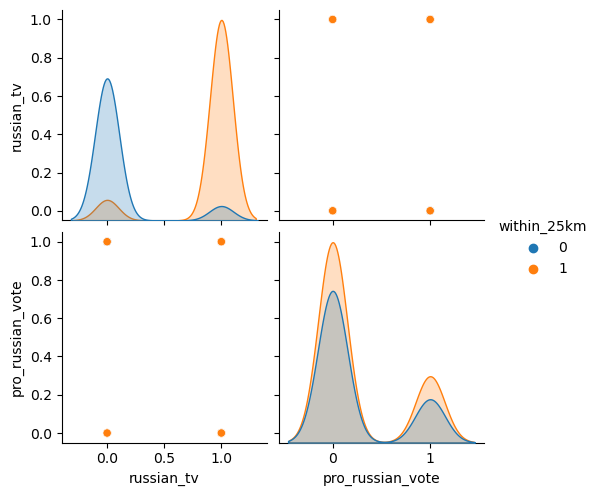

In [19]:
# using pairplot to check for confounding variables? Helpful?

sns.pairplot(survey, hue='within_25km');

#### For the purpose of this analysis we we consider the variable 'within_25km' as a confounder.

### Estimate average causal effect using observational data and a multiple linear regression model

In [17]:
model = smf.ols('pro_russian_vote ~ russian_tv + within_25km', data=survey).fit()

# print the summary which includes coefficients
model.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       pro_russian_vote   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.034
No. Observations:                 358   F-statistic:                     7.238
Covariance Type:            nonrobust   Prob (F-statistic):           0.000830
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1959      0.035      5.666      0.000       0.128       0.264
russian_tv      0.2876      0.077      3.758      0.000       0.137       0.438
within_25km    -0.2081      0.077     -2.709      0.007      -0.359      -0.057
===============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Fitted linear model            
$\widehat{pro-russian-vote}$ = 0.1959 + 0.2876 _russian_tv_ -0.2081 _within_25km_

#### When we hold living very close to the border constant, receiving Russian TV (as compared to not receiving it) increased a respondent's probability of voting for a pro-Russian party by $\approx$ 29 percentage points, on average.

The accuracy of this causal interpretation hinges on whether residing extremely close to the border is the sole confounding factor. If other confounding variables exist, the validity of this estimate of the average treatment effect would be compromised.

Can we conclude that the average treatment effect is not zero at the population level (that is, across _all_ Ukrainians who live near the border with Russia)?  
Let $\beta_1$ represent the average treatment effect (receiving Russian TV).

#### Two-Tailed Test at 5% Significance Level

null hypothesis $\quad \quad \quad$        $N_0$: $\beta_1 = 0$ 

alternative hypothesis$\quad$ $N_1$: $\beta_1 \neq 0$

In [18]:
model.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       pro_russian_vote   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.034
No. Observations:                 358   F-statistic:                     7.238
Covariance Type:            nonrobust   Prob (F-statistic):           0.000830
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1959      0.035      5.666      0.000       0.128       0.264
russian_tv      0.2876      0.077      3.758      0.000       0.137       0.438
within_25km    -0.2081      0.077     -2.709      0.007      -0.359      -0.057
===============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the table of results above, the value of the test statistic associated with $\beta_1$ is 3.758. Since the absolute value of the test statistic is greater than 1.96 (the critical value for the 5% level), we reject the null hypothesis at the 5% significance level.

The associated p-value in the table above is indicated as 0.000. Since it is smaller than 5%, here too we reject the null hypothesis and determine that the effect is statistically significant at the 5% level.

We conclude that receiving Russian TV likely had a non-zero average causal effect on the probability of voting for a pro-Russian party for _all_ Ukrainians living close to the border with Russian, not just for those who partivipated in the survey.  
Let's analyze data at an aggregate-level.

-----

## Aggregate-level analysis: Can we find a similar causal relationship at the aggregate level?

Treatment variable 'russian_tv' is measured at the precinct level. The treatment took place between the 2012 and 2014 elections. Therefore, the outcome variable is defined as the change in the vote share received by pro-Russian parties between the 2012 and 2014 elections.

In [33]:
# create outcome variable 'pro_russian_change'

uap['pro_russian_change'] = uap['pro_russian'] - uap['prior_pro_russian']

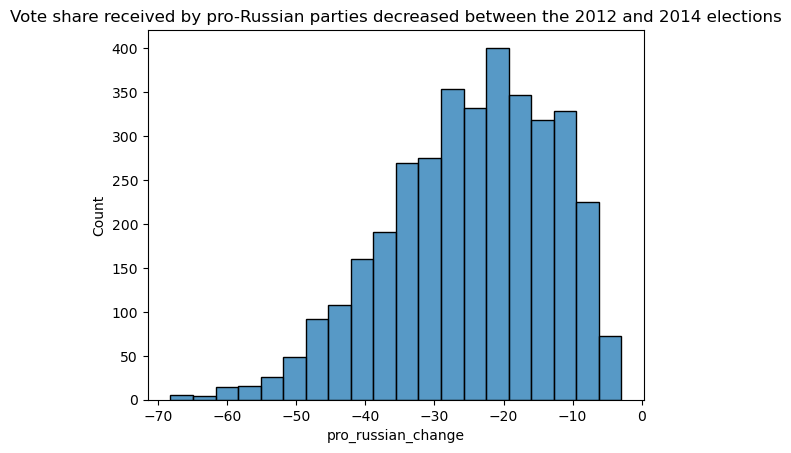

In [34]:
# plot the histogram
sns.histplot(data=uap, x='pro_russian_change', bins=20)
plt.title('Vote share received by pro-Russian parties decreased between the 2012 and 2014 elections');

### Question: Did the reception of Russian TV cause a smaller decline in the precinct-level vote share for pro-Russian parties?

-----

## Use the simple linear model to compute the difference-in-means estimator

In [35]:
model = smf.ols('pro_russian_change ~ russian_tv', data=uap).fit()

# print the summary which includes coefficients
model.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     pro_russian_change   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
No. Observations:                3589   F-statistic:                     12.78
Covariance Type:            nonrobust   Prob (F-statistic):           0.000355
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.1461      0.220   -114.428      0.000     -25.577     -24.715
russian_tv     1.7826      0.499      3.575      0.000       0.805       2.760
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Fitted linear model            
$\widehat{pro-russian-change}$ = -25.1461 + 1.7826 _russian_tv_ 

Receiving Russian TV (as compared to non receiving it) increased the change in the precinct-level vote share received by pro-Russian parties by by $\approx 1.78$ percentage points, on average.

### Answer: Pro-Russian parties experienced smaller vote share losses in precincts with Russian TV reception.

The validity of the above conclusion depends on the absence of confounding variables.

-----

## Control for confounders using a multiple linear regression model

### Identify confounder

In [27]:
uap[['within_25km','russian_tv']].corr()

,within_25km,russian_tv
within_25km,1.000000,0.531785
russian_tv,0.531785,1.000000


The correlation coefficient between the two variables is 0.53. 'within_25km' and 'russian_tv' are moderately correlated.

In [28]:
# create two-way table of frequencies
pd.crosstab(uap['within_25km'], uap['russian_tv'], margins=True, margins_name='All precincts')

russian_tv,0,1,All precincts
within_25km,,,
0,2725,321,3046
1,167,376,543
All precincts,2892,697,3589


In [29]:
round(pd.crosstab(uap['within_25km'], uap['russian_tv'], margins=True, 
                  margins_name='All precincts', normalize='index') * 100, 1)

russian_tv,0,1
within_25km,,
0,89.5,10.5
1,30.8,69.2
All precincts,80.6,19.4


Among precincts located within 25 km of the border, about 62% receive Russian TV. In contrast, among precincts located more than 25 km away from the border, about 11% receive Russian TV. We can conclude that compared to Ukrainians living further away from the border, those living very close to it are more likely to receive Russian TV. 

Living within 25 km from the border affects the treatment variable 'russian_tv.'

In [30]:
uap[['within_25km','pro_russian_change']].corr()

,within_25km,pro_russian_change
within_25km,1.000000,-0.285646
pro_russian_change,-0.285646,1.000000


A correlation coefficient of -0.29 indicates a moderate negative linear relationship between the two variables. This means that there is a noticeable trend. However, the strength of this relationship is considered moderate.

Consider the variable 'within_25km' as a confounder.

### Fit a multiple linear regression model to estimate the average treatment effect.

In [36]:
model = smf.ols('pro_russian_change ~ russian_tv + within_25km', data=uap).fit()

# print the summary which includes coefficients
model.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     pro_russian_change   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.143
No. Observations:                3589   F-statistic:                     301.5
Covariance Type:            nonrobust   Prob (F-statistic):          9.26e-122
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -24.3022      0.207   -117.593      0.000     -24.707     -23.897
russian_tv      8.8223      0.546     16.163      0.000       7.752       9.892
within_25km   -14.6139      0.603    -24.252      0.000     -15.795     -13.432
===============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Fitted linear model            
$\widehat{pro-russian-change}$ = -24.3022 + 8.8223 _russian_tv_ -14.6139 _within_25km_

#### When we hold living very close to the border constant, receiving Russian TV (as compared to not receiving it) increased the change in the precinct-level vote share received by pro-Russian party by $\approx$ 9 percentage points, on average.

The accuracy of this causal interpretation hinges on whether residing extremely close to the border is the sole confounding factor. If other confounding variables exist, the validity of this estimate of the average treatment effect would be compromised.

-----